In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# import cancer dataset

header = ['class', 'age', 'menopause', 'tumor-size','inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

from google.colab import files
uploaded = files.upload()

Saving breast-cancer-edited.csv to breast-cancer-edited.csv


In [11]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['breast-cancer-edited.csv']))

#dataset is now stored in a pandas dataframe
dataset

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30,0,30,2,0,3,0,0,0
1,no-recurrence-events,30,0,30,2,0,3,0,0,0
2,no-recurrence-events,40,0,20,2,0,2,1,4,0
3,no-recurrence-events,40,0,20,2,0,2,0,0,0
4,no-recurrence-events,60,1,15,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
273,recurrence-events,30,0,30,2,0,2,0,1,0
274,recurrence-events,30,0,20,2,0,3,0,1,1
275,recurrence-events,60,1,20,2,0,1,1,1,0
276,recurrence-events,40,1,30,2,0,3,0,0,0


In [12]:
len(dataset)

278

In [13]:
df = dataset

In [14]:
df.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [15]:
## Perubahan clasifikasi labelling di column class

df['class'] = df['class'].map({'no-recurrence-events':0, 'recurrence-events':1})
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30,0,30,2,0,3,0,0,0
1,0,30,0,30,2,0,3,0,0,0
2,0,40,0,20,2,0,2,1,4,0
3,0,40,0,20,2,0,2,0,0,0
4,0,60,1,15,2,0,2,1,1,0


In [16]:
# #numeric range age
# df['age'] = df['age'].map({'30-39':30, '40-49':40, '50-59':50, '60-69':60, '70-79':70})

# #numeric menopause type
# df['menopause'] = df['menopause'].map({'premeno':1, 'ge40':2, 'lt40':3})

# #numeric range tumor size
# df['tumor-size'] = df['tumor-size'].map({'0-4':0, '15-19':15, '20-24':20, '25-29':25, '30-34':30, 
#                                          '35-39':35, '40-44':40, '45-49':45, '50-54':50})

# #numeric range inv-nodes
# df['inv-nodes'] = df['inv-nodes'].map({'0-2':2, '15-17':17, '24-26':24})

# #numeric node caps
# df['node-caps'] = df['node-caps'].map({'no':0, 'yes':1})

# #numeric breast left right
# df['breast'] = df['breast'].map({'left':0, 'right':1})


# #df['breast-quad'] = df['breast-quad'].map({'left_low':0, 'left_up':1, 'central':2, 
#                                            #'right_low':3, 'right_up':4})

# #df['irradiat'] = df['irradiat'].map({'no':0, 'yes':1})

In [17]:
#numeric breast left right

df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30,0,30,2,0,3,0,0,0
1,0,30,0,30,2,0,3,0,0,0
2,0,40,0,20,2,0,2,1,4,0
3,0,40,0,20,2,0,2,0,0,0
4,0,60,1,15,2,0,2,1,1,0


In [18]:
x = df.iloc[:, 1:7].values
y = df.iloc[:, 0].values

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
df.fillna(0)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30,0,30,2,0,3,0,0,0
1,0,30,0,30,2,0,3,0,0,0
2,0,40,0,20,2,0,2,1,4,0
3,0,40,0,20,2,0,2,0,0,0
4,0,60,1,15,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
273,1,30,0,30,2,0,2,0,1,0
274,1,30,0,20,2,0,3,0,1,1
275,1,60,1,20,2,0,1,1,1,0
276,1,40,1,30,2,0,3,0,0,0


In [24]:
# # Encoding categorical data values
# from sklearn.preprocessing import LabelEncoder
# labelencoder_Y = LabelEncoder()
# y = labelencoder_Y.fit_transform(y)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)

In [26]:
print(f"Numbers of train instances by class: {np.bincount(y_train)}")
print(f"Numbers of test instances by class: {np.bincount(y_test)}")

Numbers of train instances by class: [144  64]
Numbers of test instances by class: [53 17]


In [27]:
#Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8


Confusion matrix, from naive bayes
[[49  4]
 [10  7]]
Normalized confusion matrix
[[0.9245283  0.0754717 ]
 [0.58823529 0.41176471]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        53
           1       0.64      0.41      0.50        17

    accuracy                           0.80        70
   macro avg       0.73      0.67      0.69        70
weighted avg       0.78      0.80      0.78        70



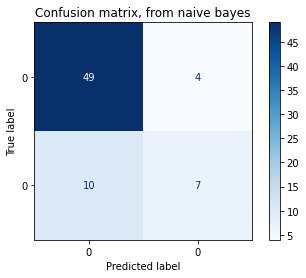

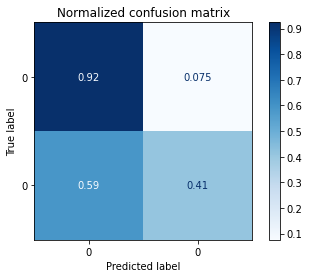

In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


titles_options = [("Confusion matrix, from naive bayes", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

print(classification_report(y_test, y_pred))

plt.show()

In [39]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [40]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.6857142857142857
